### Data Analysis Target Selling Price For Cars

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [132]:
df = pd.read_csv('car.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [133]:
df.duplicated().sum()

np.int64(763)

In [134]:
before = len(df)
df = df[df.duplicated() != True].copy()
print(before-len(df))

763


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [136]:
df.describe().round(2)

,year,selling_price,km_driven
count,3577.00,3577.00,3577.00
mean,2012.96,473912.54,69250.55
std,4.25,509301.81,47579.94
min,1992.00,20000.00,1.00
25%,2010.00,200000.00,36000.00
50%,2013.00,350000.00,60000.00
75%,2016.00,600000.00,90000.00
max,2020.00,8900000.00,806599.00


In [137]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [138]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [139]:
# adding cars age
df['age']=2025-df['year']


In [140]:
num_cols= df.select_dtypes(include=['number']).columns.tolist()
cat_cols= df.select_dtypes(include=['object']).columns.tolist()
num_cols,cat_cols

(['year', 'selling_price', 'km_driven', 'age'],
 ['name', 'fuel', 'seller_type', 'transmission', 'owner'])

In [141]:
for col in cat_cols:
    print(f'{col}\n {df[col].unique()}')
    print(f'\n {df[col].value_counts()} \n')
    

name
 ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']

 name
Maruti Swift Dzire VDI        54
Maruti Alto 800 LXI           48
Maruti Alto LXi               42
Maruti Alto LX                30
Maruti Swift VDI BSIV         28
                              ..
Honda City i-DTEC VX           1
Nissan Terrano XE 85 PS        1
Fiat Punto EVO 1.3 Emotion     1
Toyota Fortuner 2.7 2WD AT     1
Mahindra XUV500 W10 AWD        1
Name: count, Length: 1491, dtype: int64 

fuel
 ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']

 fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64 

seller_type
 ['Individual' 'Dealer' 'Trustmark Dealer']

 seller_type
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64 

transmission
 ['Manual' 'Automatic']

 transmission
Manual

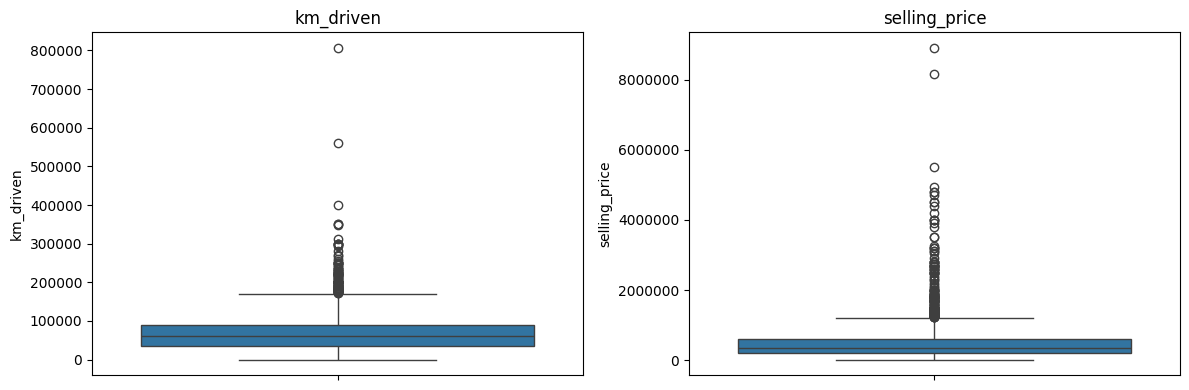

In [142]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
cols = ['km_driven','selling_price']
for ax,col in zip(axes,cols):
    sns.boxplot(df[col], ax= ax)
    ax.ticklabel_format(style = 'plain',axis = 'y')
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [143]:
before= len(df)
df= df[df['selling_price']<=6000000].copy()
print('Deleted Rows',before-len(df))

before= len(df)
df= df[df['km_driven']<=500000].copy()
print('Deleted Rows',before-len(df))

Deleted Rows 2
Deleted Rows 2


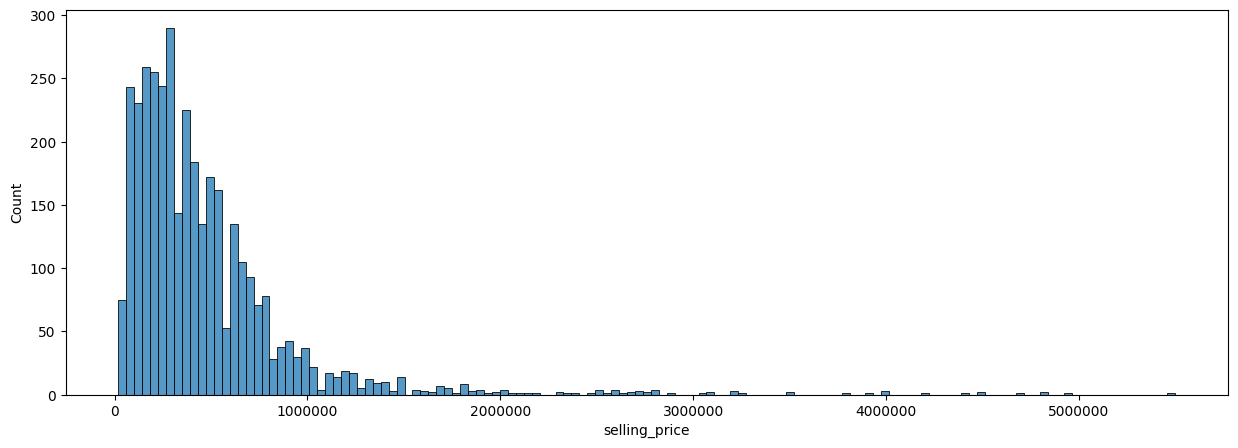

In [144]:
# Compare selling price with numerical data
plt.figure(figsize=(15,5))
ax = sns.histplot(x=df['selling_price'], bins=133)
ax.ticklabel_format(style = 'plain',axis = 'x') 

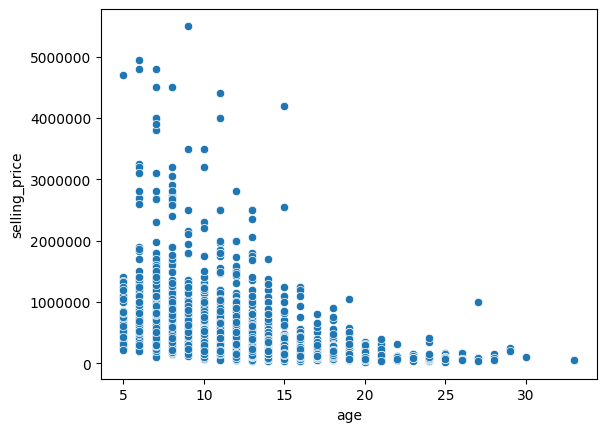

In [145]:
axTwo = sns.scatterplot(df, x='age', y='selling_price')
axTwo.ticklabel_format(style = 'plain',axis = 'y') 

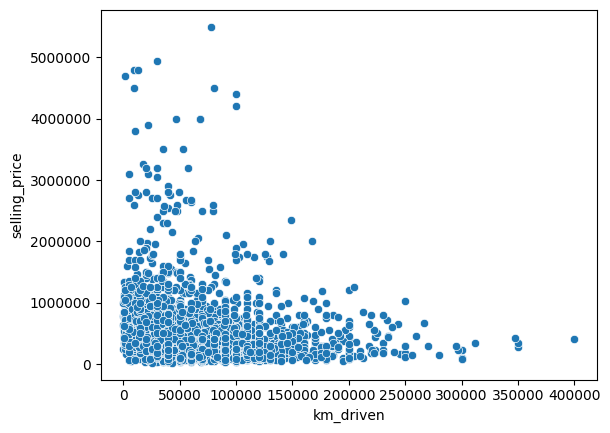

In [146]:
axThree = sns.scatterplot(df, x='km_driven', y='selling_price')
axThree.ticklabel_format(style = 'plain',axis = 'y') 

In [147]:
df['km_group']= pd.cut(df['km_driven'],
                      bins=[0,50000,100000,150000,200000,500000],
                      labels=['0-50','50-100','100-150','150-200','200+'])

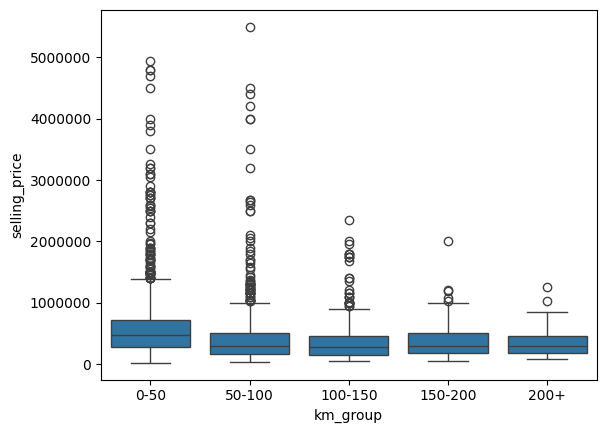

In [148]:
axFour = sns.boxplot(df, x='km_group', y='selling_price')
axFour.ticklabel_format(style = 'plain',axis = 'y') 


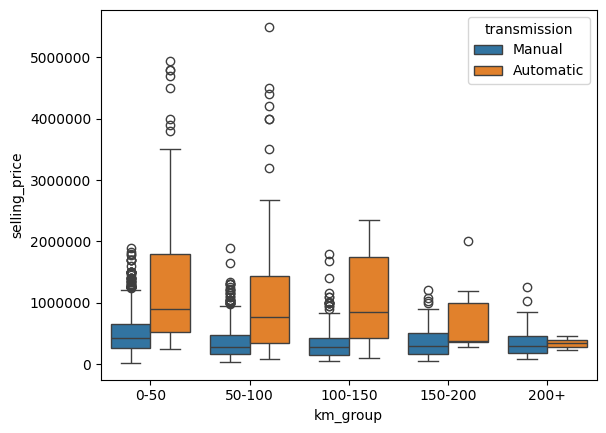

In [149]:
axFive = sns.boxplot(df, x='km_group', y='selling_price',hue='transmission')
axFive.ticklabel_format(style = 'plain',axis = 'y') 


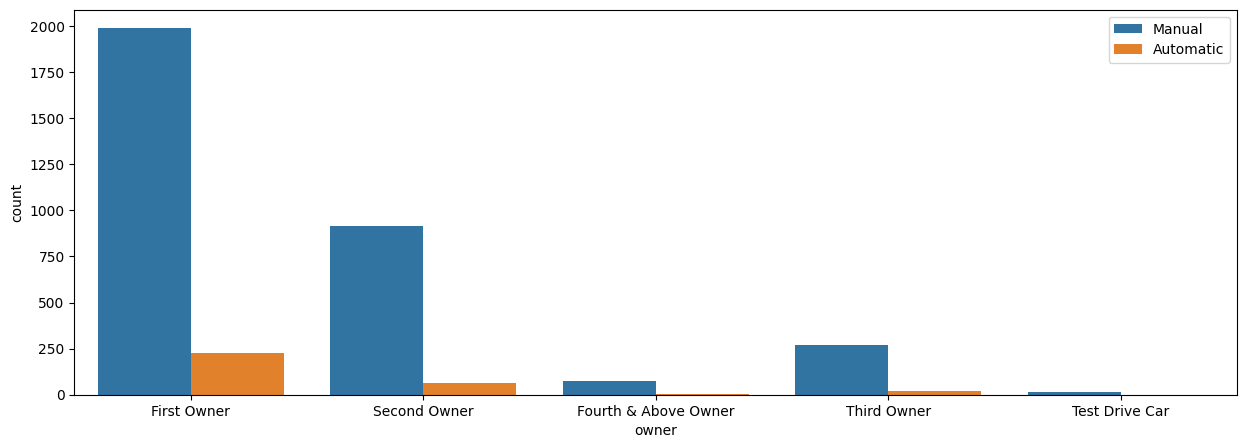

In [150]:
plt.figure(figsize=(15,5))
axSix = sns.countplot(df, x = 'owner', hue='transmission')
plt.legend()



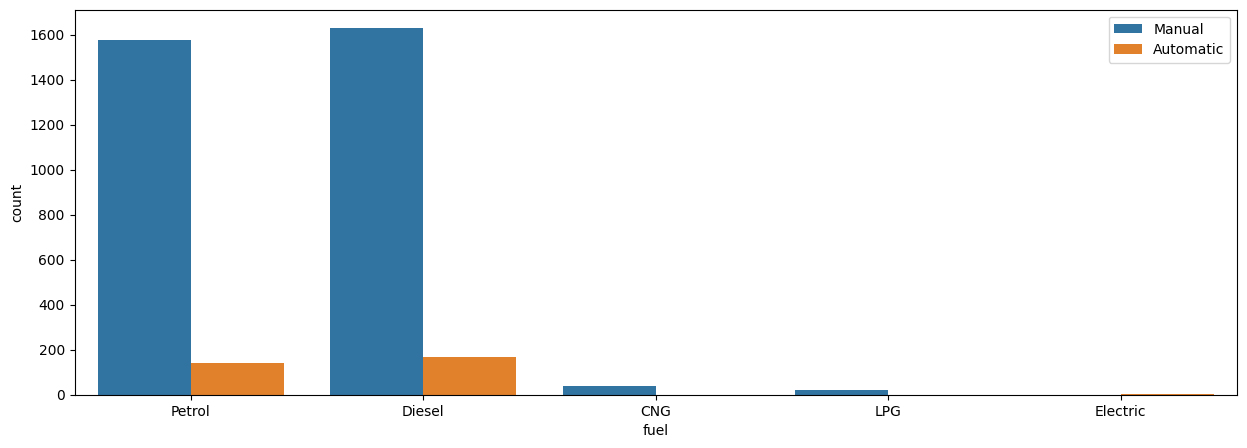

In [151]:
plt.figure(figsize=(15,5))
axSix = sns.countplot(df, x = 'fuel', hue='transmission')
plt.legend()

